### Load Data

In [20]:
import json
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
%matplotlib inline

message_counts = defaultdict(Counter)

with open('../local_data/graph.json', 'r') as infile:
    data = json.load(infile)
    for message in data:
        message_counts[message['sender']].update(message['recipients'])
message_matrix = pd.DataFrame(message_counts)
adj_list = message_matrix.stack().reset_index()
adj_list.columns = ['from', 'to', 'count']


### Function to rank an adjacency list based on a given alpha

In [92]:
def score(adj_list, alpha):
    graph = nx.DiGraph()
    graph.add_weighted_edges_from(adj_list.itertuples(index=False))
    scores = pd.Series(nx.pagerank(graph, alpha=alpha), index=graph.nodes(), name='pagerank')
    return scores

### Plot bump chart for various alphas

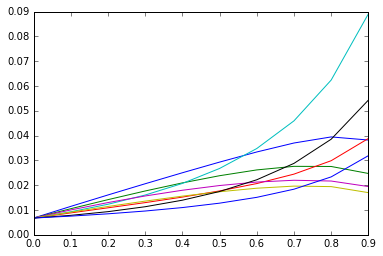

In [112]:
scores = pd.DataFrame({a: score(adj_list, a) for a in np.arange(0,1,0.1)}).T
important = set(scores.sum().sort_values().tail(8).index.values)

for p in important:
    plt.plot(scores[p])
plt.show()


### assuming 10% forward rate, here's a better ranking:

In [114]:
score(adj_list, 0.1).rank(method='first', ascending=False).sort_values()

Bill Williams III      1
John J Lavorato        2
Mike Grigsby           3
Jeff Dasovich          4
Chris Germany          5
Tana Jones             6
Susan M Scott          7
Louise Kitchen         8
Scott Neal             9
Sally Beck            10
Phillip M Love        11
James D Steffes       12
Debra Perlingiere     13
Kate Symes            14
Errol McLaughlin      15
Don Baughman Jr.      16
Mary Hain             17
Sara Shackleton       18
John Arnold           19
Stephanie Panus       20
Matthew Lenhart       21
Cara Semperger        22
Eric Bass             23
Kevin M Presto        24
Vince J Kaminski      25
Kimberly Watson       26
Kam Keiser            27
Steven J Kean         28
Shelley Corman        29
Phillip K Allen       30
                    ... 
Monika Causholli     119
Jeff King            120
Kevin Ruscitti       121
Brad Mckay           122
Judy Townsend        123
Eric Saibi           124
Paul Y'Barbo         125
Joe Parks            126
Robert Badeer        127
